<a href="https://colab.research.google.com/github/erickgt00/MLMCD/blob/main/tareas/Tarea%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 6

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from prettytable import PrettyTable

warnings.filterwarnings('ignore')

Leeremos ambos archivos, el test y el train para llevar a cabo la comparación y así elegir el mejor modelo.

In [5]:
df = pd.read_csv('train.csv')

Tomamos únicamente las variables de ínteres

In [6]:
df = train1_df[['ID','Loan Amount','Term','Interest Rate','Grade','Loan Status']]
df.head()



,ID,Loan Amount,Term,Interest Rate,Grade,Loan Status
0,65087372,10000,59,11.135007,2,0
1,1450153,3609,59,12.237563,3,0
2,1969101,28276,59,12.545884,6,0
3,6651430,11170,59,16.731201,3,0
4,14354669,16890,59,15.008300,3,0


In [ ]:
print(df.iloc[:10].to_latex(index=False))

Establecemos el 80% de los datos para el train y el 20% restante para el test

In [32]:
test1_df = df.tail(13494) # 20% of dataset will be used for testing
test_df = test1_df.drop("Loan Status", axis=1)
test_df

,ID,Loan Amount,Term,Interest Rate,Grade
53969,61300904,13639,58,9.691307,1
53970,65190099,19842,59,6.095775,3
53971,43157711,21444,58,12.081569,2
53972,2696780,5486,59,8.017538,6
53973,1714814,11931,58,18.844249,2
...,...,...,...,...,...
67458,16164945,13601,59,9.408858,3
67459,35182714,8323,59,9.972104,3
67460,16435904,15897,59,19.650943,1
67461,5300325,16567,59,13.169095,4


In [9]:
train_df = df.drop(test_df.index)
train_df

,ID,Loan Amount,Term,Interest Rate,Grade,Loan Status
0,65087372,10000,59,11.135007,2,0
1,1450153,3609,59,12.237563,3,0
2,1969101,28276,59,12.545884,6,0
3,6651430,11170,59,16.731201,3,0
4,14354669,16890,59,15.008300,3,0
...,...,...,...,...,...,...
53964,6991505,11550,58,10.913305,3,0
53965,27751682,10815,58,15.077551,3,1
53966,45382106,33511,59,9.126601,2,0
53967,6005203,13914,59,13.909706,4,0


Haremos pruebas para los siguientes modelos:
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
X_train = train_df.drop("Loan Status", axis=1)
Y_train = train_df["Loan Status"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((53969, 5), (53969,), (13494, 5))

In [46]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predLR = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

90.68

In [47]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_predSVM = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

90.68

In [51]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predKNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn


91.43

In [52]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_predGNB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

90.68

In [53]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_predP = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

90.68

In [54]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_predLSVC = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

90.68

In [55]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_predSGD = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

90.68

In [56]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [57]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predRF = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.99

En resumen:

In [21]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,91.43
0,Support Vector Machines,90.68
2,Logistic Regression,90.68
4,Naive Bayes,90.68
5,Perceptron,90.68
6,Stochastic Gradient Decent,90.68
7,Linear SVC,90.68


In [49]:
models1 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree']})

In [ ]:
print(models.sort_values(by='Score', ascending=False).to_latex(index=False))

Podemos concluir que el mejor modelo es el de Decision Tree con un 100% de precisión.

In [45]:
Y_preddt[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_real = test1_df['Loan Status']
Y_real

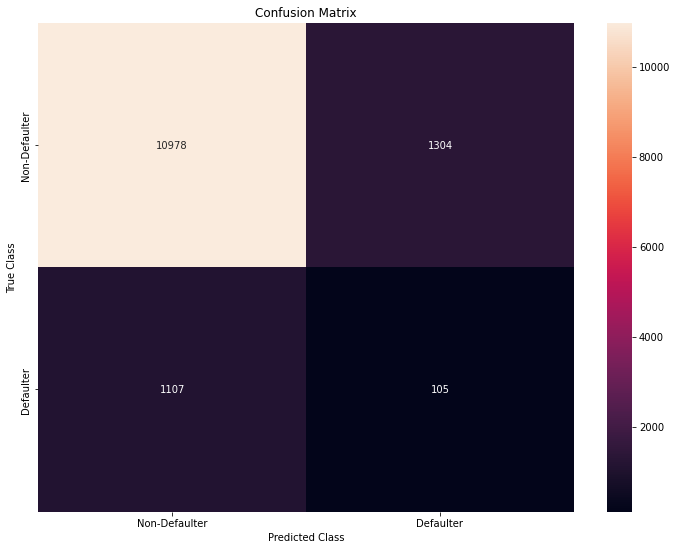

In [35]:
cm = confusion_matrix(Y_real, Y_preddt)
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(cm,annot = True, fmt ='g', ax = ax)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
plt.show()

In [36]:
from sklearn.metrics import precision_score
precision = precision_score(Y_real, Y_preddt)
print("Precisión:", precision)

Precisión: 0.0745209368346345


In [37]:
from sklearn.metrics import recall_score
recall = recall_score(Y_real, Y_preddt)
print("Recall:", recall)

Recall: 0.08663366336633663


In [58]:
Y_predLR

(13494,)

In [ ]:
# Aqui solo descargo el archivo de mi predicción c:
submission = pd.DataFrame({
        "ID": test_df["ID"],
        "Loan Status": Y_pred
    })
submission.to_csv('/content/salida/subminssion.csv', index=False)